# Midterm Assignment <br>
## 🏭 Global CO2 Emissions 🌎
### Mati Borlak (337588149)

### Part 1 - Emissions Data from MavenAnalytics

"This data set includes global fossil fuel emissions data from 1750 - 2021 by country, paired with population data for the same year/country detail. Historical CO2 datapoints are estimated based off of the industrial factors reflected in each time period."

*(Source: Our World in Data)* <br>
*(License: CC BY 4.0)*

### Part 2 - Investigate

### Data Meaning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    data_dict_df = pd.read_excel("visualizing_global_CO2_emissions_data_dictionary.xlsx")
except:
    path = "https://docs.google.com/spreadsheets/d/1f84EF1Rn-j2oofFZmpId77BWIcDnEiM7/view?usp=drive_link"
    path ='https://drive.google.com/uc?id=' + path.split('/')[-2]
    data_dict_df = pd.read_excel(path)

for _, row in data_dict_df.iterrows():
    print(f"{row['column']}: {row['description']}")

country: Geographic location.
year: Year of observation.
iso_code: ISO 3166-1 alpha-3, three-letter country codes.
population: Population by country and year.
gdp: Gross domestic product measured in international-$ using 2011 prices to adjust for price changes over time (inflation) and price differences between countries. Calculated by multiplying GDP per capita with population.
cement_co2: Annual emissions of carbon dioxide (CO2) from cement, measured in million tonnes.
cement_co2_per_capita: Annual CO2 emissions from cement (per capita) - Annual emissions of carbon dioxide (CO2) from cement, measured in tonnes per person.
co2: Annual total emissions of carbon dioxide (CO2), excluding land-use change, measured in million tonnes.
co2_growth_abs: Annual growth in total emissions of carbon dioxide (CO2), excluding land-use change, measured in million tonnes.
co2_growth_prct: Annual CO2 emissions growth (%) - Annual percentage growth in total emissions of carbon dioxide (CO2), excluding l

There are many pre-calculated columns from pivot tables (values per gdp, etc.), cumulative values, and percentage of overall (share_global). <br>
The main columns that all of these are derived from are (and will focus on for my analysis):
- country & iso_code
- year
- population
- gdp
- co2
- methane 
- nitrous_oxide
- total_ghg

### Data Size

In [3]:
try:
    df = pd.read_csv("visualizing_global_co2_data.csv")
except:
    path = "https://drive.google.com/file/d/16w_qjmvXFkPcR7tt4W1UKQC7ZIwgK8sR/view?usp=sharing" 
    path = 'https://drive.google.com/uc?id=' + path.split('/')[-2]
    df = pd.read_csv(path)

print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 50598 rows and 79 columns.


In [4]:
# Display unique values in the 'country' column
df['country'].unique()

array(['Afghanistan', 'Africa', 'Africa (GCP)', 'Aland Islands',
       'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia', 'Asia (GCP)',
       'Asia (excl. China and India)', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Central America (GCP)', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmar

The country column has some non-country (regions, significant emissions events, continents, socioeconomic categories..) so we will use the iso_code (only countries). First, save a dictionary of iso_codes so we can use the full country names.

In [5]:
iso_to_country = df.drop_duplicates(subset=['iso_code']).set_index('iso_code')['country'].to_dict()
iso_to_country_clean = {k: v for k, v in iso_to_country.items() if pd.notna(k)}
display(iso_to_country_clean)

{'AFG': 'Afghanistan',
 'ALA': 'Aland Islands',
 'ALB': 'Albania',
 'DZA': 'Algeria',
 'ASM': 'American Samoa',
 'AND': 'Andorra',
 'AGO': 'Angola',
 'AIA': 'Anguilla',
 'ATA': 'Antarctica',
 'ATG': 'Antigua and Barbuda',
 'ARG': 'Argentina',
 'ARM': 'Armenia',
 'ABW': 'Aruba',
 'AUS': 'Australia',
 'AUT': 'Austria',
 'AZE': 'Azerbaijan',
 'BHS': 'Bahamas',
 'BHR': 'Bahrain',
 'BGD': 'Bangladesh',
 'BRB': 'Barbados',
 'BLR': 'Belarus',
 'BEL': 'Belgium',
 'BLZ': 'Belize',
 'BEN': 'Benin',
 'BMU': 'Bermuda',
 'BTN': 'Bhutan',
 'BOL': 'Bolivia',
 'BES': 'Bonaire Sint Eustatius and Saba',
 'BIH': 'Bosnia and Herzegovina',
 'BWA': 'Botswana',
 'BRA': 'Brazil',
 'VGB': 'British Virgin Islands',
 'BRN': 'Brunei',
 'BGR': 'Bulgaria',
 'BFA': 'Burkina Faso',
 'BDI': 'Burundi',
 'KHM': 'Cambodia',
 'CMR': 'Cameroon',
 'CAN': 'Canada',
 'CPV': 'Cape Verde',
 'CAF': 'Central African Republic',
 'TCD': 'Chad',
 'CHL': 'Chile',
 'CHN': 'China',
 'CXR': 'Christmas Island',
 'COL': 'Colombia',
 'COM'

In [6]:
# Keep only the specified columns in df
columns_to_keep = [
    'iso_code', 'year', 'population', 'gdp', 'co2', 'methane', 'nitrous_oxide',
    'total_ghg'
]
df = df[columns_to_keep]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50598 entries, 0 to 50597
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   iso_code       42142 non-null  object 
 1   year           50598 non-null  int64  
 2   population     40008 non-null  float64
 3   gdp            14564 non-null  float64
 4   co2            31349 non-null  float64
 5   methane        6150 non-null   float64
 6   nitrous_oxide  6150 non-null   float64
 7   total_ghg      6149 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.1+ MB


### Feature Shape

In [7]:
df.describe()

,year,population,gdp,co2,methane,nitrous_oxide,total_ghg
count,50598.000000,4.000800e+04,1.456400e+04,31349.000000,6150.000000,6150.000000,6149.000000
mean,1925.365173,5.926810e+07,2.677586e+11,380.237549,145.654502,53.197833,771.485168
std,59.882945,3.222866e+08,2.103151e+12,1801.527942,650.938390,231.409555,3553.425123
min,1750.000000,2.100000e+01,4.998000e+07,0.000000,0.000000,0.000000,-186.550000
25%,1882.000000,3.198618e+05,7.516679e+09,0.125000,2.110000,0.580000,8.440000
50%,1929.000000,2.323117e+06,2.597999e+10,3.109000,9.425000,3.750000,38.050000
75%,1975.000000,9.802751e+06,1.132942e+11,43.730000,37.657500,15.647500,151.150000
max,2021.000000,7.909295e+09,1.136302e+14,37123.852000,8609.920000,3096.790000,49758.230000


To show distribution of each feature, I will focus on one country's rows.

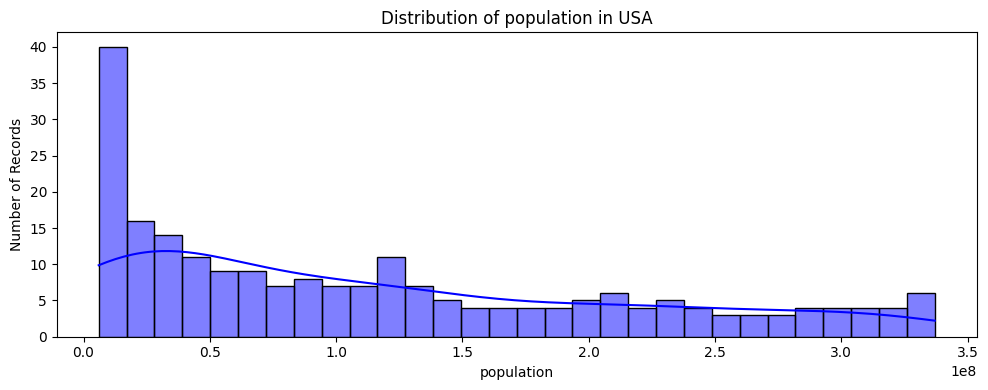

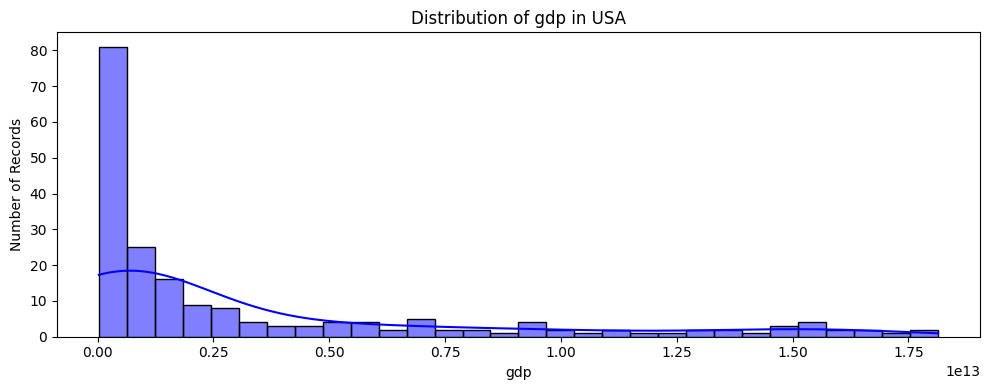

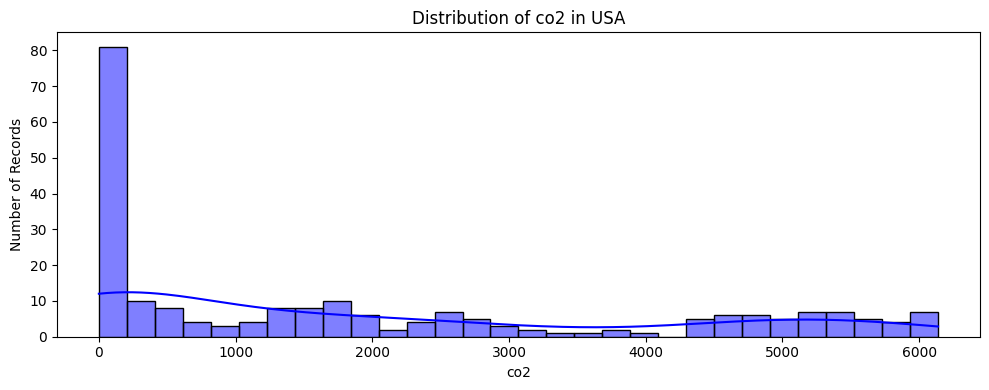

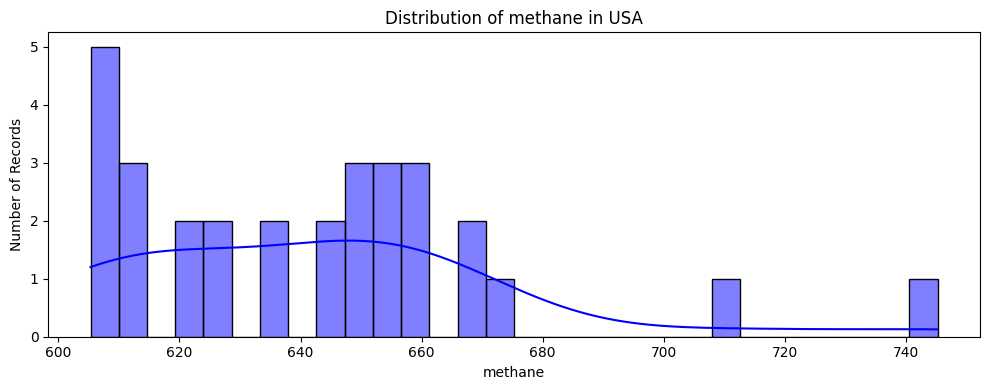

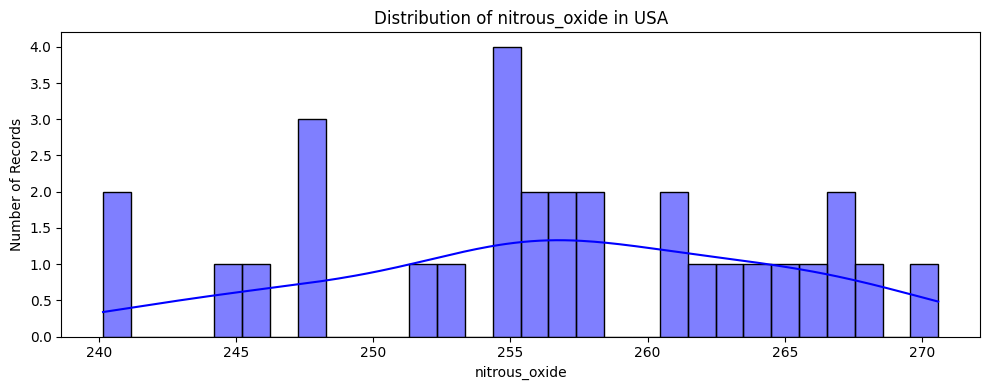

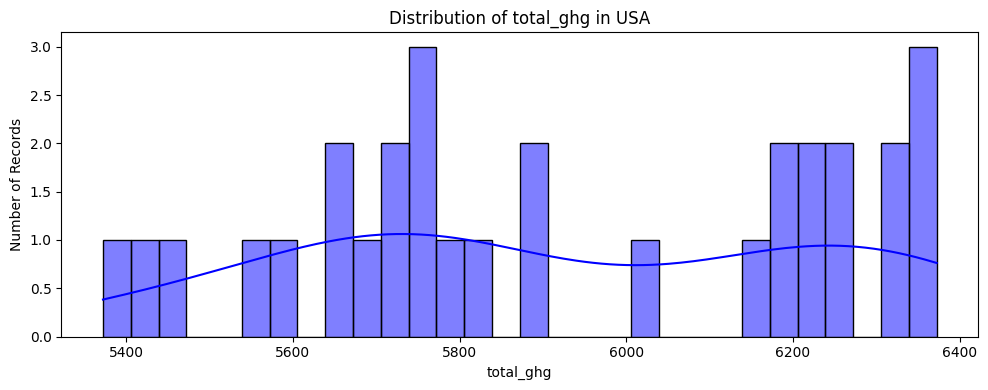

In [8]:
COUNTRY = 'USA'

for column in df.columns:
    if column != 'iso_code' and column != 'year':
        plt.figure(figsize=(10, 4))
        data = df[(df['iso_code'] == COUNTRY) & df[column].notna() & (df[column] != 0)][column]
        sns.histplot(data, bins=30, kde=True, color='blue')
        plt.xlabel(column)
        plt.ylabel('Number of Records')
        plt.title(f'Distribution of {column} in {COUNTRY}')
        plt.tight_layout()
        plt.show()


### Trends in Features

Let's show trend over years using worldwide average of each feature.

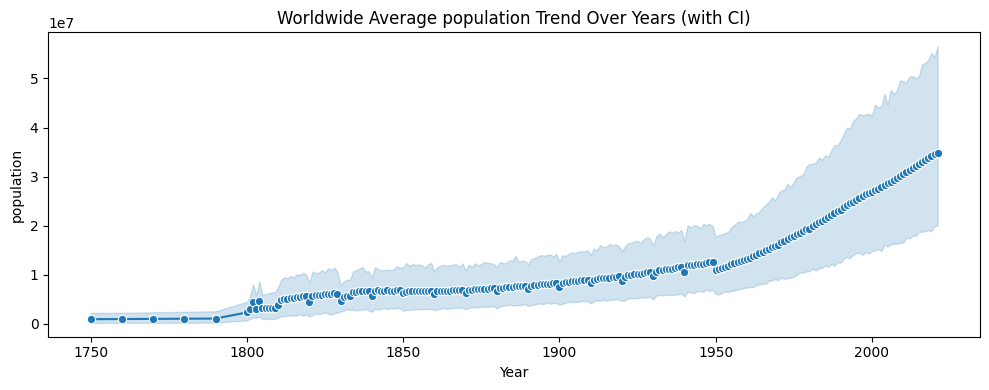

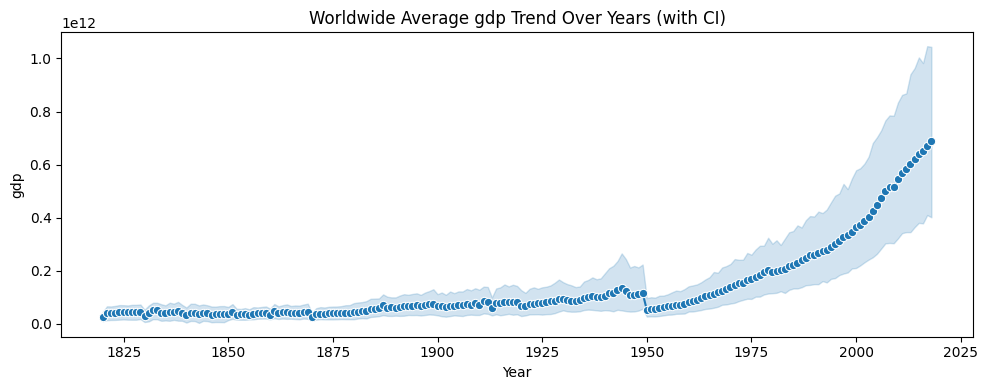

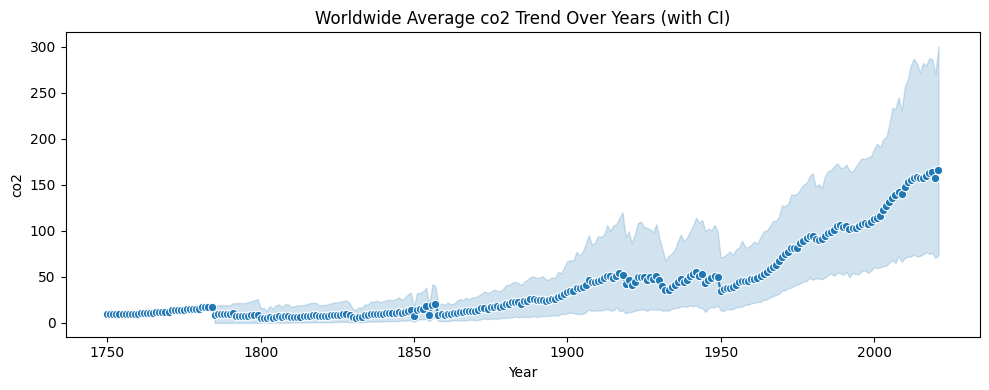

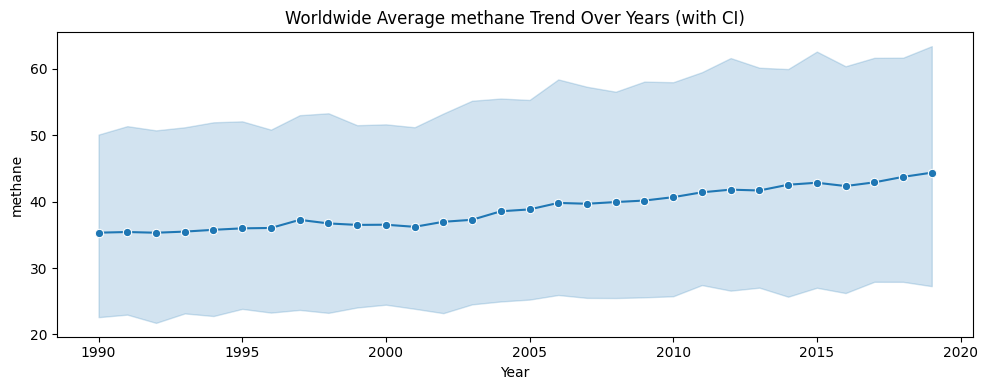

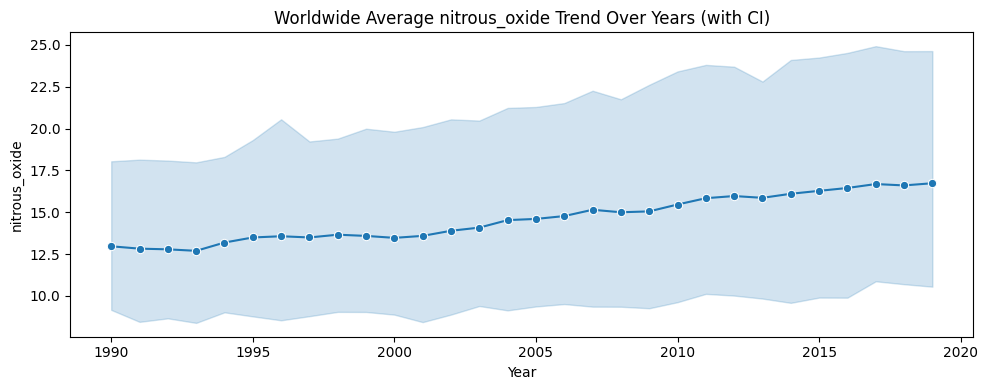

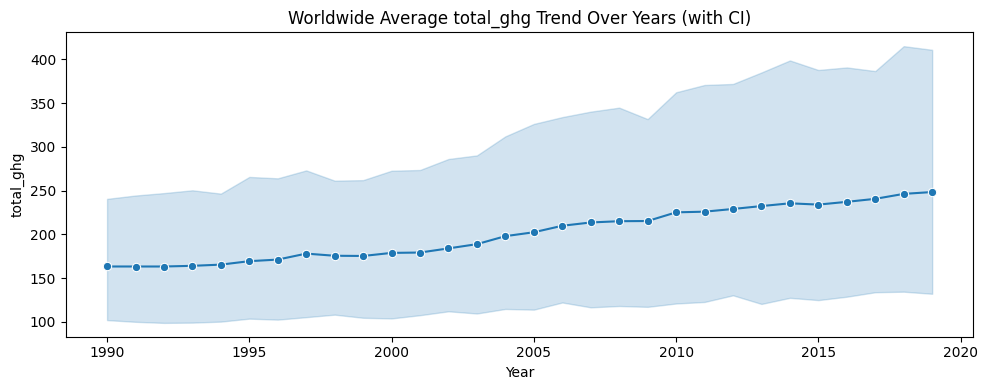

In [9]:
# Filter rows where iso_code is not null (i.e., keep only countries)
df_countries = df[df['iso_code'].notna()]

for column in df_countries.columns:
    if column != 'iso_code' and column != 'year':
        plt.figure(figsize=(10, 4))
        data = df_countries[df_countries[column].notna() & (df_countries[column] != 0)]
        # Use seaborn lineplot to plot mean with confidence interval
        sns.lineplot(
            data=data,
            x='year',
            y=column,
            estimator='mean',
            marker='o'
        )
        plt.xlabel('Year')
        plt.ylabel(column)
        plt.title(f'Worldwide Average {column} Trend Over Years (with CI)')
        plt.tight_layout()
        plt.show()

### Relationships Among Features

Multifeature Analysis starting with correlation heatmap.

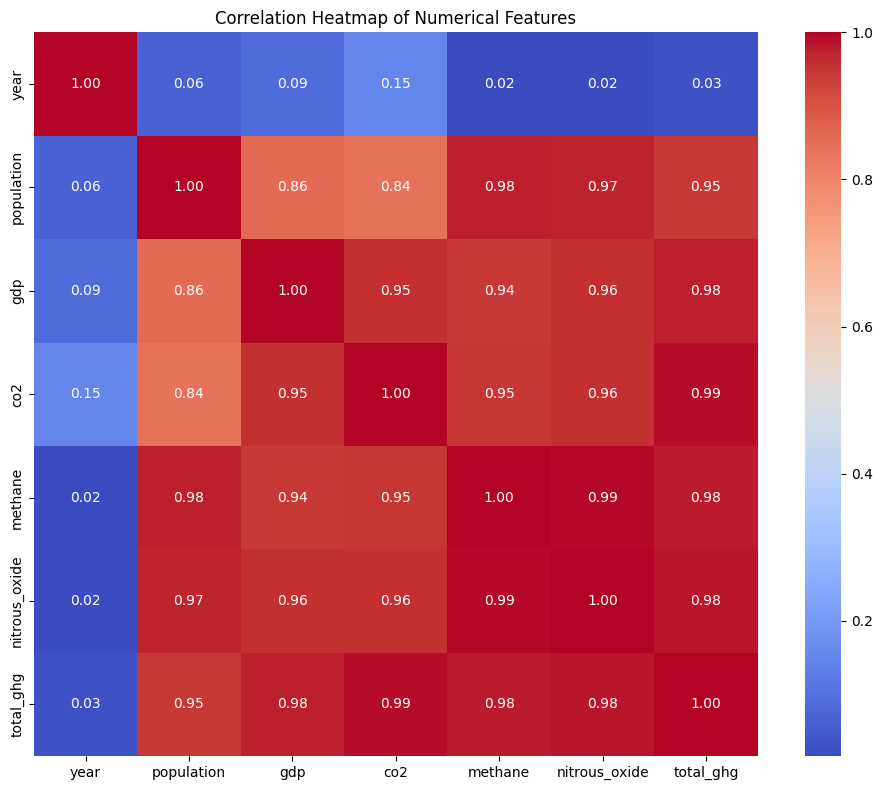

In [10]:
# Compute correlation matrix for numerical features
corr = df.select_dtypes(include='number').corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

Makes total sense that all but year has a strong correlation with each other. Increased consumption, production, and population are all causes for increased emissions of all greenhouse gases. <br>
We also saw in the monofeature analysis that, over time, all the features have been increasing. <br>

## The Hall of Shame - which countries are the biggest emmitors of C02

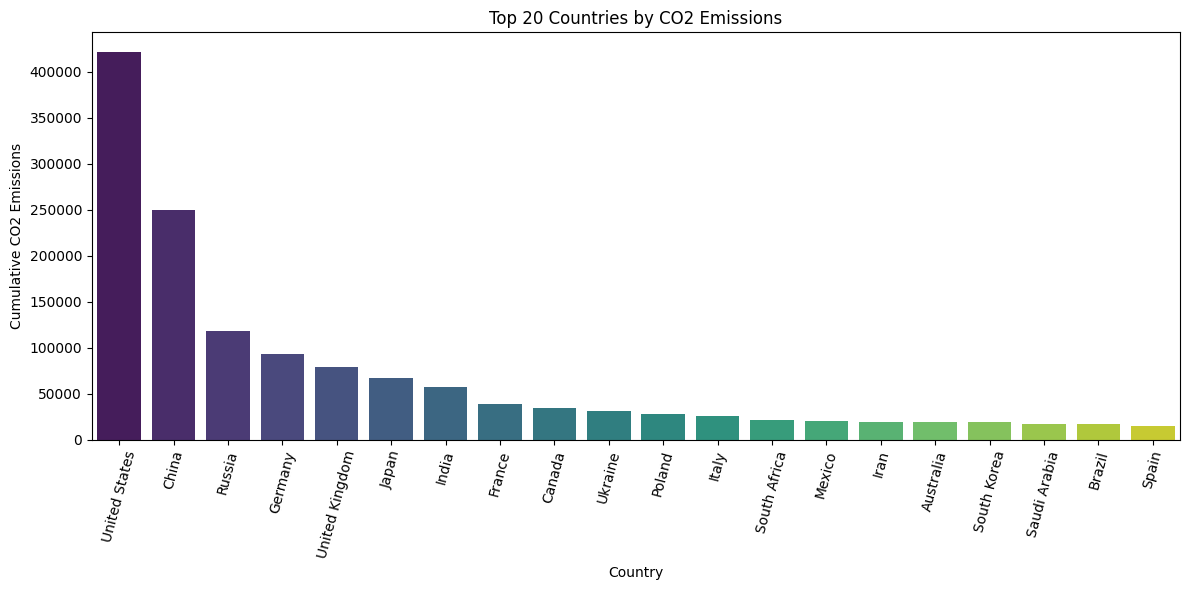

In [11]:
# 1. Group by iso_code and sum total_ghg emissions
cumulative_ghg = df.groupby('iso_code', as_index=False)['co2'].sum()

# 2. Sort to get top 20 countries
top20_ghg = cumulative_ghg.sort_values('co2', ascending=False).head(20)

# Map iso_code to country names for better readability
top20_ghg['country'] = top20_ghg['iso_code'].map(iso_to_country_clean)

# 3. Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=top20_ghg, x='country', hue='country', y='co2', palette='viridis',legend=False)
plt.xticks(rotation=75)
plt.xlabel('Country')
plt.ylabel('Cumulative CO2 Emissions')
plt.title('Top 20 Countries by CO2 Emissions')
plt.tight_layout()
plt.show()

This graph is skewed toward countries with highest GDP. These appear to be the largest oil consumers. <br>
Let's see per capita:

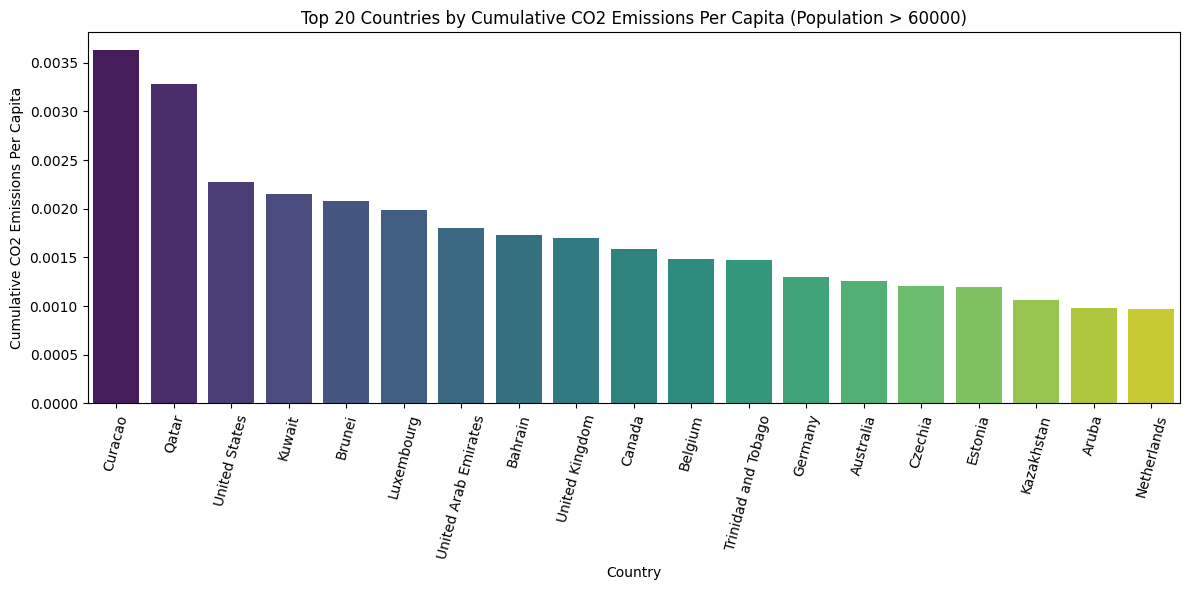

In [12]:
# Define a population threshold (e.g., minimum 1 million average population)
POP_THRESHOLD = 60_000

df['total_co2_per_capita'] = df.apply(
    lambda row: row['co2'] / row['population'] if pd.notnull(row['co2']) and pd.notnull(row['population']) and row['population'] != 0 else None,
    axis=1
)

# 1. Group by iso_code and sum total_co2_per_capita
cumulative_ghg_per_capita = df.groupby('iso_code', as_index=False)['total_co2_per_capita'].sum()

# 2. Sort to get top 20 countries
top20_ghg_per_capita = cumulative_ghg_per_capita.sort_values('total_co2_per_capita', ascending=False).head(20)

# Map iso_code to country names for better readability
top20_ghg_per_capita['country'] = top20_ghg_per_capita['iso_code'].map(iso_to_country_clean)

# Calculate average population per country
avg_pop = df.groupby('iso_code')['population'].mean()

# Filter iso_codes with average population above threshold
valid_iso_codes = avg_pop[avg_pop > POP_THRESHOLD].index

# Filter top20_ghg_per_capita to only include countries above the population threshold
filtered_top20 = top20_ghg_per_capita[top20_ghg_per_capita['iso_code'].isin(valid_iso_codes)]

# Take top 20 from filtered list
filtered_top20 = filtered_top20.sort_values('total_co2_per_capita', ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=filtered_top20,
    x='country',
    y='total_co2_per_capita',
    hue='country',
    palette='viridis',
    legend=False
)
plt.xticks(rotation=75)
plt.xlabel('Country')
plt.ylabel('Cumulative CO2 Emissions Per Capita')
plt.title(f'Top 20 Countries by Cumulative CO2 Emissions Per Capita (Population > {POP_THRESHOLD})')
plt.tight_layout()
plt.show()

When we investigate per capita, more oil producing countries appear. There are a few Carribean islands that enter because of their small population and some less developed countries. I suppose this is due to lack of environmental regulations in these less-developed countries.

### Part 3 - Insights

- The dataset provides a comprehensive view of global fossil fuel emissions and population data by country and year, with a focus on key greenhouse gases (CO2, methane, nitrous oxide, total GHG).

- There is a strong positive correlation among emissions, population, and GDP. As countries grow economically and demographically, their emissions tend to increase.

- All major emission features have shown a consistent increase over time, reflecting industrialization and population growth worldwide.

- The countries with the highest cumulative CO2 emissions are typically those with the largest economies and populations (e.g., USA, China, Russia).

- When normalized by population, oil-producing countries and some smaller nations (e.g., Curacao, Qatar, Kuwait) rank highest in per capita emissions, highlighting the impact of resource extraction and small population sizes.

- Both absolute and per capita emissions analyses are necessary to understand the global emissions landscape. Large economies dominate total emissions, while smaller, resource-rich countries often lead in per capita terms.